# RFM Analysis 

Customer segmentation is the practice of grouping customers based on common characteristics. These customer segments are beneficial in marketing campaigns, in identifying potentially profitable customers, and in developing customer loyalty. A company might segment customers according to a wide range of factors, including: demographics (age, gender, location etc), behaviour (previous orders, responses to messaging), psychographics (values, interests, lifestyles) etc.

RFM (Recency-Frequency-Monetary) analysis is a simple technique for behaviour based customer segmentation. It groups customers based on their transaction history – how recently, how often and how much did they buy. It is a handy method to find the best customers, understand their behavior and then run targeted marketing campaigns to increase sales, satisfaction and customer lifetime value.

The goal of this analysis is to identify customer segments for global retail company using RFM analysis and to understand how those groups differ from each other.

In [1]:
cd C:\Users\AMF29\Downloads\Yasmine

C:\Users\AMF29\Downloads\Yasmine


In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("RFM - Superstore_Datase.csv")

In [5]:
df.columns = [col.lower().replace(' ', '_') for col in df.columns]
df = df.drop(['row_id', 'ship_date', 'customer_name', 'postal_code', 'shipping_cost', 'order_priority'], axis=1)


In [6]:
df.head()

,order_id,order_date,ship_mode,customer_id,segment,city,state,country,market,region,product_id,category,sub-category,product_name,sales,quantity,discount,profit
0,AG-2011-2040,1/1/2011,Standard Class,TB-11280,Consumer,Constantine,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140
1,IN-2011-47883,1/1/2011,Standard Class,JH-15985,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036
2,HU-2011-1220,1/1/2011,Second Class,AT-735,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640
3,IT-2011-3647632,1/1/2011,Second Class,EM-14140,Home Office,Stockholm,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055
4,IN-2011-47883,1/1/2011,Standard Class,JH-15985,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770


In [7]:
# Make the date_placed column datetime
df['order_date'] = pd.to_datetime(df['order_date'])

## RFM Quartiles

### Create the RFM Table


***Recency, Frequency, Monetary***
RFM model combines three different customer attributes to rank customers:

* Recency (R): Who have purchased recently? Number of days since last purchase
* Frequency (F): Who has purchased frequently? The total number of purchases
* Monetary Value(M): Who has high purchase amount? The total money customer spent

If the customer bought in recent past, he gets higher points. If he bought many times, he gets higher score. And if he spent a lot of money, he gets more points.

In [8]:
# Proint the minimum and the maximum "Order Date" from the dataframe

print("Min:{}; Max:{}".format(min(df["order_date"]),max(df["order_date"])))

Min:2011-01-01 00:00:00; Max:2014-12-31 00:00:00


In [9]:
#create a snapshot_day data as if we're doing analysis recently.

snapshot_date = max(df["order_date"]) + dt.timedelta(days=1)

snapshot_date.date()

datetime.date(2015, 1, 1)



How to create segments?

* Concatenate all scores into one, eg: 3-4-1 (R-F-M) and group customers according to those values. It gives 125 combinations which is difficult to depict and understand
* Sum all scores into one, eg: 8 (3 + 4 + 1) and group customers according to this number. It creates 13 groups which is much easier to work with but it disregards relations between R & F & M
* Segment customers based on set of rules applied to R-F-M scores. It creates 10 groups, such as "champions", "needing attention" or "at risk"

In [28]:
# Calculate Recency, Frequency, and Monetary values for each customer 

df_rfm = df.groupby(["customer_id"]).agg(
            {
            "order_date": lambda x: (snapshot_date - x.max()).days,
            "order_id": "count",
            "sales": "sum"}).reset_index()

#.reset_index() method takes that grouping key and converts it into a regular column within the DataFrame. 

In [30]:
#agg_dict1 = {
#    'order_id': 'count',
#    'order_date': 'max',
#    'sales': 'sum'}
#df_rfm = df.groupby('customer_id').agg(agg_dict1).reset_index()
#df_rfm.columns = ['customer_id', 'frequency', 'max_date', 'monetary']
#df_rfm['recency'] = (today - df_rfm['max_date']).dt.days
#df_rfm.drop(['max_date'], axis=1, inplace=True)

In [31]:
# Rename the columns

df_rfm.rename(columns={
                         "order_date": "recency",
                         "order_id": "frequency",
                         "sales": "monetary"}, 
                         inplace=True)

In [32]:
df_rfm.head()

,customer_id,recency,frequency,monetary
0,AA-10315,9,42,13747.41300
1,AA-10375,7,42,5884.19500
2,AA-10480,118,38,17695.58978
3,AA-10645,27,73,15343.89070
4,AA-315,3,8,2243.25600


### Determining RFM Quartiles

In [ ]:
# quantiles = rfmTable.quantile(q=[0.25,0.5,0.75])
# quantiles = quantiles.to_dict()


In [33]:
r_labels, f_labels, m_labels = range(5, 0, -1), range(1,6), range(1,6)

df_rfm['r_score'] = pd.qcut(df_rfm['recency'], q=5, labels=r_labels).astype(int)
df_rfm['f_score'] = pd.qcut(df_rfm['frequency'], q=5, labels=f_labels).astype(int)
df_rfm['m_score'] = pd.qcut(df_rfm['monetary'], q=5, labels=m_labels).astype(int)

df_rfm['rfm_sum'] = df_rfm['r_score'] + df_rfm['f_score'] + df_rfm['m_score']

In [34]:
df_rfm

,customer_id,recency,frequency,monetary,r_score,f_score,m_score,rfm_sum
0,AA-10315,9,42,13747.41300,5,4,4,13
1,AA-10375,7,42,5884.19500,5,4,3,12
2,AA-10480,118,38,17695.58978,2,3,5,10
3,AA-10645,27,73,15343.89070,4,5,5,14
4,AA-315,3,8,2243.25600,5,1,2,8
...,...,...,...,...,...,...,...,...
1585,YS-21880,10,54,18703.60600,5,4,5,14
1586,ZC-11910,201,1,7.17300,1,1,1,3
1587,ZC-21910,4,84,28472.81926,5,5,5,15
1588,ZD-11925,4,18,2951.22600,5,3,2,10


### Creating the RFM segmentation table

***RFM Customer Segments***
* Champions - bought recently, buy often and spend the most
* Loyal Customers - spend good money and often, responsive to promotions
* Potential Loyalist - recent customers, but spent a good amount and bought more than once
* New Customers - bought most recently, but not often
* Promising - recent shoppers, but haven’t spent much
* Needing Attention - above average recency, frequency and monetary values; may not have bought very recently though
* About To Sleep - below average recency, frequency and monetary values; will lose them if not reactivated
* At Risk - spent big money and purchased often but long time ago; need to bring them back
* Can't Loose Them - made biggest purchases, and often but haven’t returned for a long time
* Hibernating - last purchase was long back, low spenders and low number of orders

In [35]:
def assign_label(df, r_rule, fm_rule, label, colname='rfm_label'):
    df.loc[(df['r_score'].between(r_rule[0], r_rule[1]))
            & (df['f_score'].between(fm_rule[0], fm_rule[1])), colname] = label
    return df

In [36]:
df_rfm['rfm_label'] = ''

df_rfm = assign_label(df_rfm, (5,5), (4,5), 'champions')
df_rfm = assign_label(df_rfm, (3,4), (4,5), 'loyal customers')
df_rfm = assign_label(df_rfm, (4,5), (2,3), 'potential loyalist')
df_rfm = assign_label(df_rfm, (5,5), (1,1), 'new customers')
df_rfm = assign_label(df_rfm, (4,4), (1,1), 'promising')
df_rfm = assign_label(df_rfm, (3,3), (3,3), 'needing attention')
df_rfm = assign_label(df_rfm, (3,3), (1,2), 'about to sleep')
df_rfm = assign_label(df_rfm, (1,2), (3,4), 'at risk')
df_rfm = assign_label(df_rfm, (1,2), (5,5), 'cant loose them')
df_rfm = assign_label(df_rfm, (1,2), (1,2), 'hibernating')

***Distribution of Recency, Frequency and Monetary***


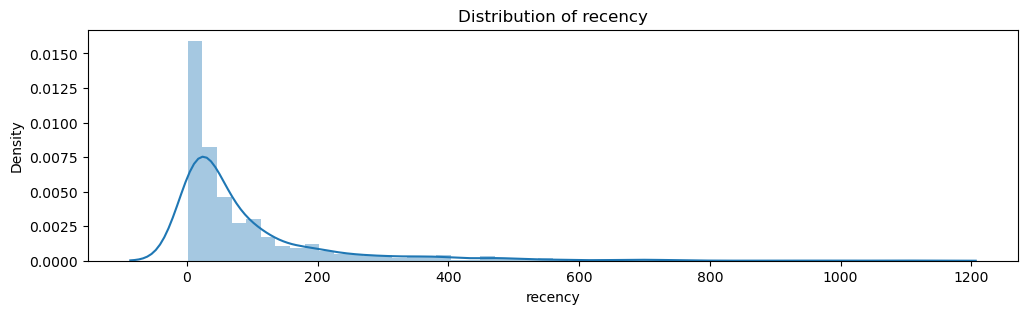

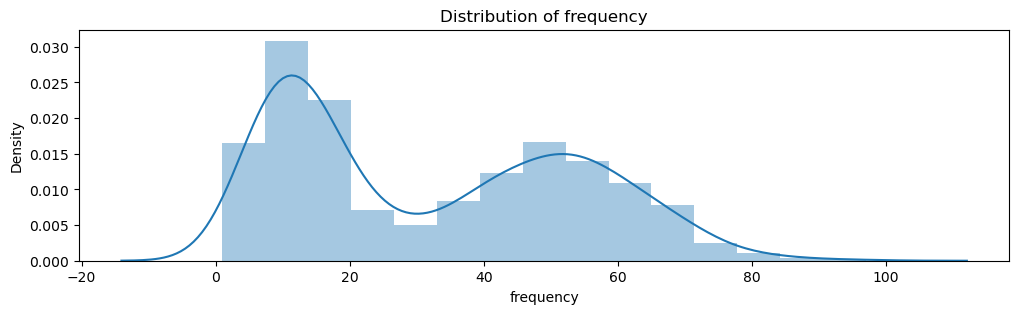

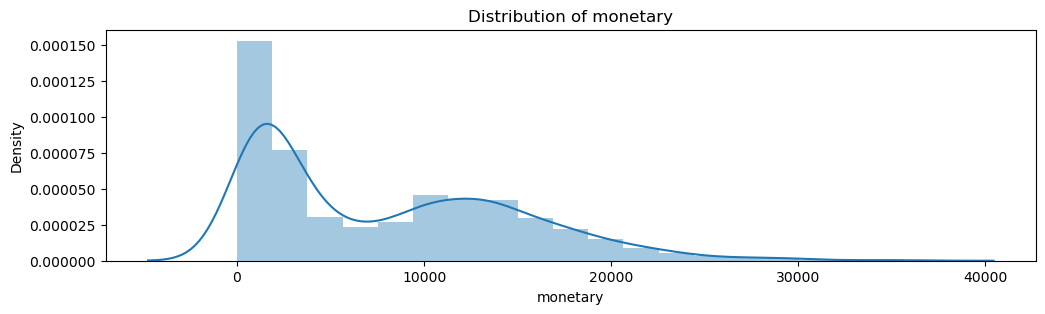

In [37]:
colnames = ['recency', 'frequency', 'monetary']

for col in colnames:
    fig, ax = plt.subplots(figsize=(12,3))
    sns.distplot(df_rfm[col])
    ax.set_title('Distribution of %s' % col)
    plt.show()


Recency distribution is right-skewed, showing that the majority of customers made a purchase in the recent past. It has a long tail containing single customers who made their order long time ago.

Both frequency and monetary distributions are bimodal (with two different peaks - modes). The chart reveals that one group of customers has low frequency (small number of orders, around 10 per customer) and another group is much more "loyal" (with around 50 purchases per customer). When it comes to monetary, it follows similar pattern. Part of customers have only spent little amount of money but there is another (significant in size) group that have spent much more.

Frequency and monetary distributions suggest that there are visible differences between different groups of customers. By looking at the distribution of three the biggest segments: "loyal customers", "hibernating", "potential loyalist" it's easy to see that indeed they build up different parts of total distribution, eg. hibernating customers are responsible for first monetary peak and loyal customers for the second peak.

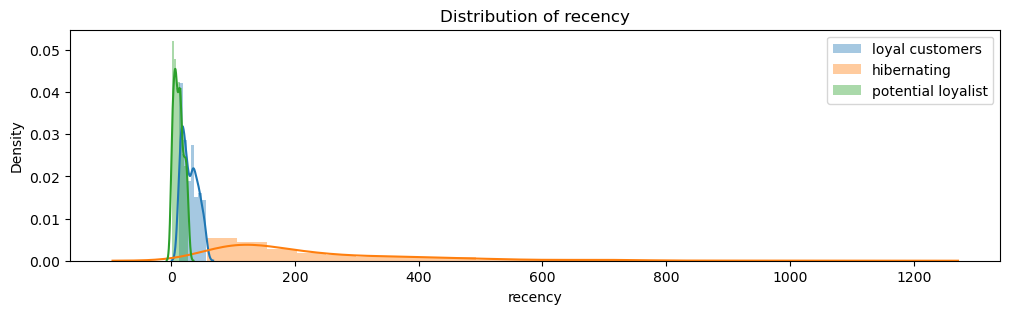

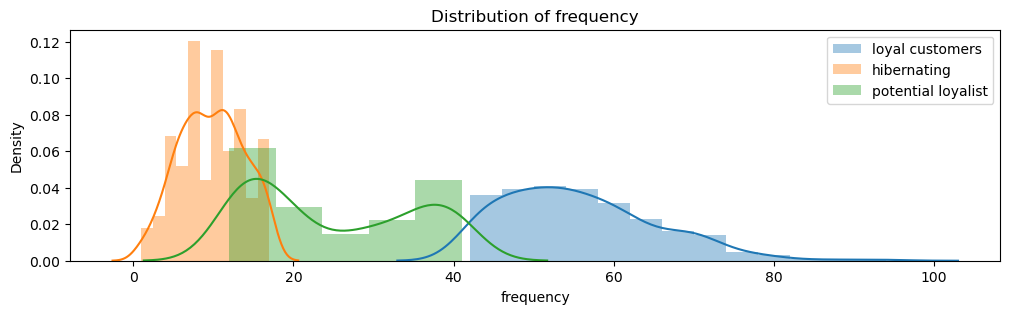

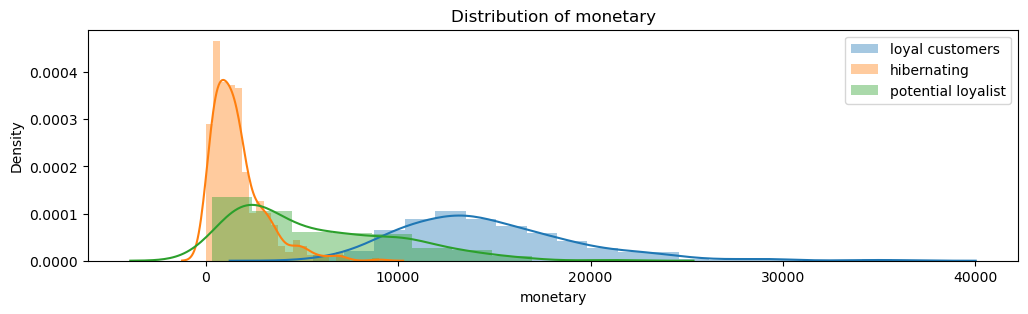

In [38]:
segments = ['loyal customers', 'hibernating', 'potential loyalist']

for col in colnames:
    fig, ax = plt.subplots(figsize=(12,3))
    for segment in segments:
        sns.distplot(df_rfm[df_rfm['rfm_label']==segment][col], label=segment)
    ax.set_title('Distribution of %s' % col)
    plt.legend()
    plt.show()

***Analysis of RFM Segments***

Analysis of clusters obtained by summing up RFM scores shows that their sizes are quite similar. There is a peak around score = 12 which shows that the group of customers from segments 11-13 is numerous - those are the customers that generate stable, significant income. The smallest segment is for RFM score = 15 - it's understandable cause those are the most valuable gems in the customer base. Although it's the smallest group, it is still quite big in size.

Analysis of clusters based on set of rules applied to R-F-M scores is much more diverse. It's good to see that 'loyal customers' and 'potential loyalists' constitute around 1/3 of all customers (generating almost 1/2 of sales). What is more, there is strong group of 'champions' who are the most profitable customers (13% of all customers generating 25% of all sales). At the same time it should worry that group of 'hibernating' is so big - over 1/4 of all customers. There is an opportunity that part of this group could be reactivated with a reach out campaign. Moreover, the company should focus on the group 'at risk' to increase customer retention (they generate 10% of total sales).

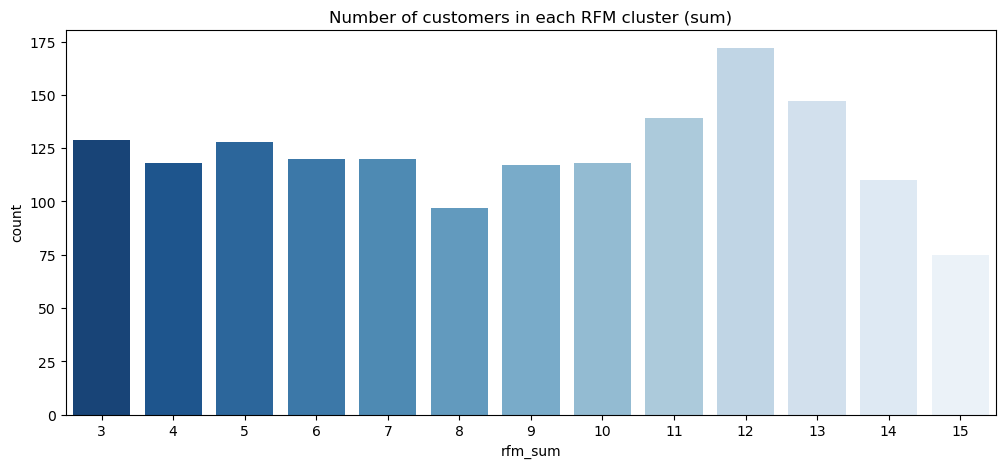

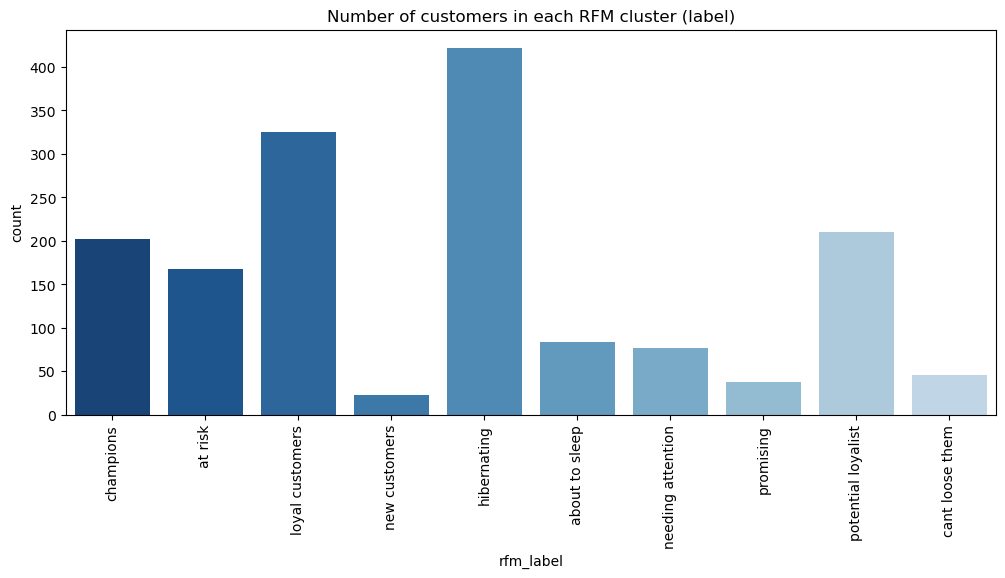

In [39]:
palette = sns.color_palette("Blues_r", n_colors=13)

for rfm_type in ['sum', 'label']:
    fig, ax = plt.subplots(figsize=(12,5))
    sns.countplot(x='rfm_'+rfm_type, data=df_rfm, palette=palette)
    ax.set_title('Number of customers in each RFM cluster (%s)' % rfm_type)
    if rfm_type == 'label':
        plt.xticks(rotation=90)
    plt.show()


In [40]:
agg_dict2 = {
    'customer_id': 'count',
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': 'sum'
}

df_analysis = df_rfm.groupby('rfm_label').agg(agg_dict2).sort_values(by='recency').reset_index()
df_analysis.rename({'rfm_label': 'label', 'customer_id': 'count'}, axis=1, inplace=True)
df_analysis['count_share'] = df_analysis['count'] / df_analysis['count'].sum()
df_analysis['monetary_share'] = df_analysis['monetary'] / df_analysis['monetary'].sum()
df_analysis['monetary'] = df_analysis['monetary'] / df_analysis['count']

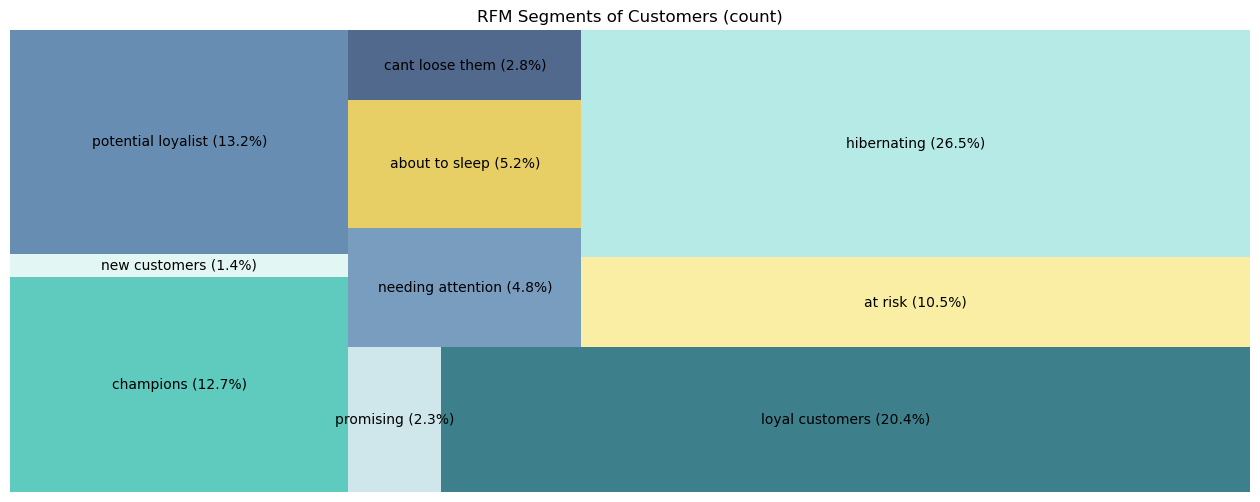

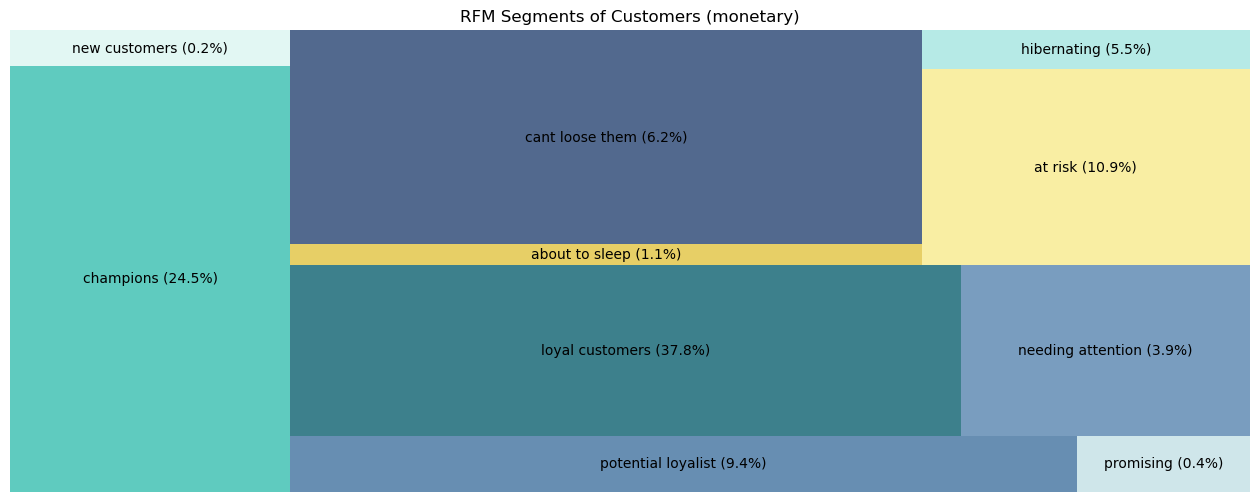

In [41]:
colors = ['#37BEB0', '#DBF5F0', '#41729F', '#C3E0E5', '#0C6170', '#5885AF', '#E1C340', '#274472', '#F8EA8C', '#A4E5E0', '#1848A0']

for col in ['count', 'monetary']:
    labels = df_analysis['label'] + df_analysis[col + '_share'].apply(lambda x: ' ({0:.1f}%)'.format(x*100))

    fig, ax = plt.subplots(figsize=(16,6))
    squarify.plot(sizes=df_analysis[col], label=labels, alpha=.8, color=colors)
    ax.set_title('RFM Segments of Customers (%s)' % col)
    plt.axis('off')
    plt.show()

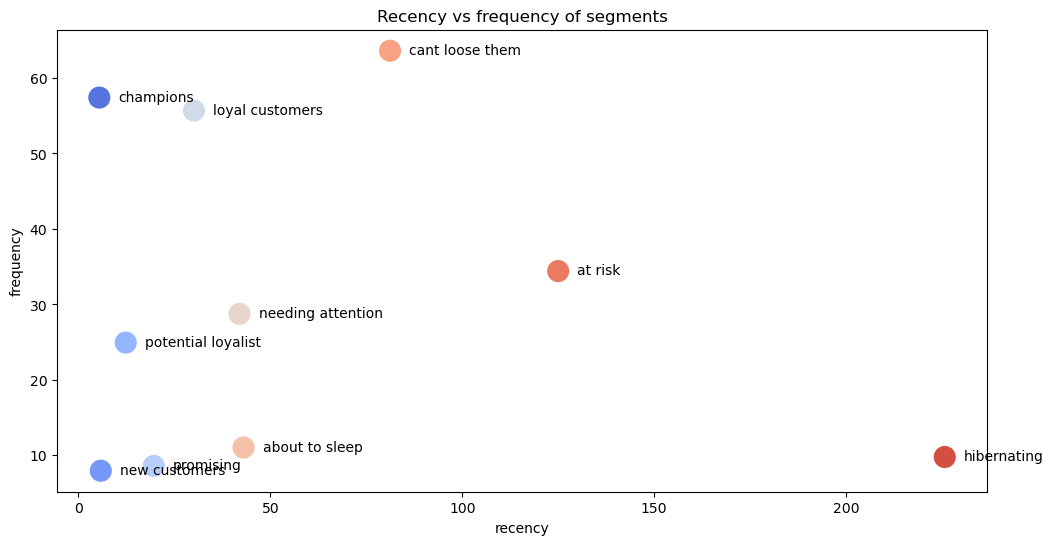

In [42]:
palette = sns.color_palette("coolwarm", 10)

fig, ax = plt.subplots(figsize=(12,6))
plot = sns.scatterplot(x='recency', y='frequency', data=df_analysis, hue='label', s=300, palette=palette)

for i in range(len(df_analysis)):
     plot.text(df_analysis['recency'][i]+5,
               df_analysis['frequency'][i]-0.5,
               df_analysis['label'][i],
               horizontalalignment='left',
               size='medium', color='black')

ax.set_title('Recency vs frequency of segments')
ax.get_legend().remove()
plt.show()

***Behavioral Analysis of RFM Segments***

In this part, let's examine customers' transaction history. Quantity of products in order and sales are highly correlated with each other (linear relationship) - groups of custmers who place orders with numerous products generate big sales at the same time. It implies that average price of one product is similar between segments.

Segments generating the highest sales are: 'can't loose them', 'loyal customers' and 'champions'. They also have high RFM score (dark purple color of a marker) and they are responsible for the highest profit (the biggest size of a marker).

In [43]:
df = df.merge(df_rfm[['customer_id', 'rfm_sum', 'rfm_label']], on='customer_id', how='left')

In [44]:
agg_dict4 = {
    'product_id': 'count',
    'quantity': 'sum',
    'sales': 'sum',
    'discount': 'sum',
    'profit': 'sum',
    'rfm_sum': 'first',
    'rfm_label': 'first'
}

df_order = df.groupby('order_id').agg(agg_dict4).reset_index()
df_order_segment = df_order.groupby('rfm_label')[['quantity', 'sales', 'discount', 'profit', 'rfm_sum']].mean().reset_index()

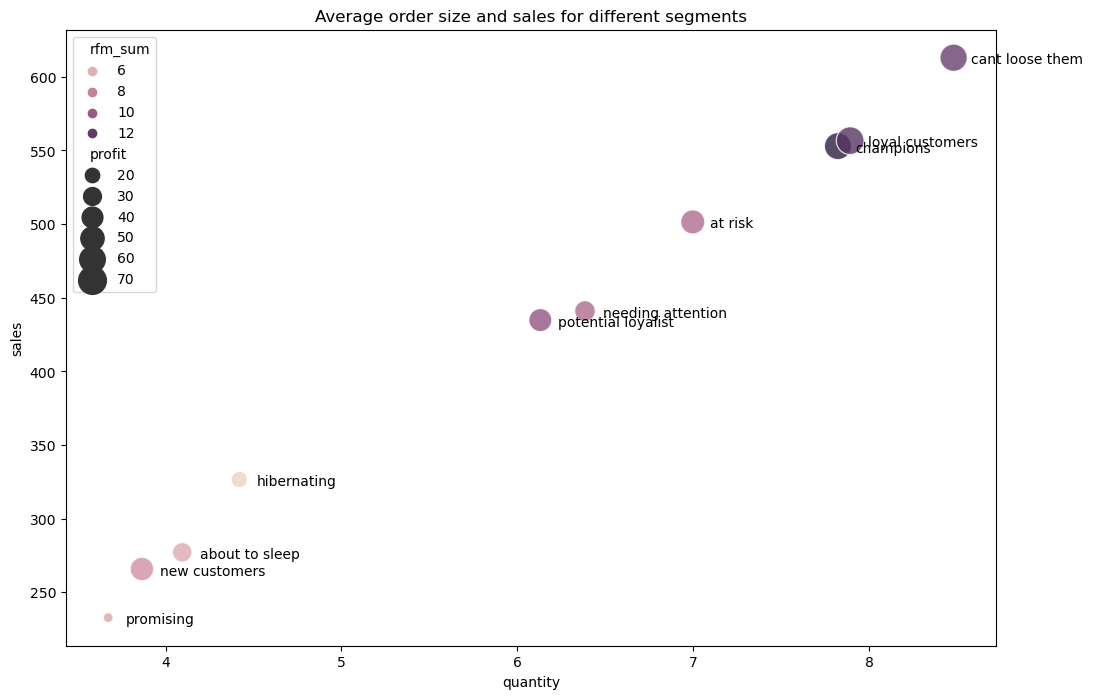

In [45]:
fig, ax = plt.subplots(figsize=(12,8))
plot = sns.scatterplot(x='quantity', y='sales', data=df_order_segment, size='profit', sizes=(50,400), hue='rfm_sum', alpha=.8)

for i in range(len(df_order_segment)):
     plot.text(df_order_segment['quantity'][i]+0.1,
               df_order_segment['sales'][i]-4,
               df_order_segment['rfm_label'][i],
               horizontalalignment='left',
               size='medium', color='black')

ax.set_title('Average order size and sales for different segments')
plt.show()

## RFM KMeans

***Data Preprocessing for k-means***

At this point, the metrics are scaled, fitted, and transformed for KMeans clustering.

Key k-means assumptions

1. Symmetric distribution of variables(not skewed).

2. Variables with same average values.

3. Variables with same variance.

In [82]:
df_rfm.head()

,customer_id,recency,frequency,monetary,r_score,f_score,m_score,rfm_sum,rfm_label
0,AA-10315,9,42,13747.41300,5,4,4,13,champions
1,AA-10375,7,42,5884.19500,5,4,3,12,champions
2,AA-10480,118,38,17695.58978,2,3,5,10,at risk
3,AA-10645,27,73,15343.89070,4,5,5,14,loyal customers
4,AA-315,3,8,2243.25600,5,1,2,8,new customers


In [47]:
# Explore the summary statistics of datamart

df_rfm.describe().round(2)

,recency,frequency,monetary,r_score,f_score,m_score,rfm_sum
count,1590.00,1590.00,1590.00,1590.00,1590.00,1590.00,1590.00
mean,88.62,32.26,7951.26,3.01,2.94,3.00,8.95
std,127.88,21.91,6936.57,1.42,1.43,1.41,3.66
min,1.00,1.00,7.17,1.00,1.00,1.00,3.00
25%,15.00,12.00,1674.81,2.00,2.00,2.00,6.00
50%,41.00,28.00,6248.14,3.00,3.00,3.00,9.00
75%,104.00,52.00,13133.10,4.00,4.00,4.00,12.00
max,1119.00,97.00,35668.12,5.00,5.00,5.00,15.00


In [50]:
df_rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1590 entries, 0 to 1589
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  1590 non-null   object 
 1   recency      1590 non-null   int64  
 2   frequency    1590 non-null   int64  
 3   monetary     1590 non-null   float64
 4   r_score      1590 non-null   int32  
 5   f_score      1590 non-null   int32  
 6   m_score      1590 non-null   int32  
 7   rfm_sum      1590 non-null   int32  
 8   rfm_label    1590 non-null   object 
dtypes: float64(1), int32(4), int64(2), object(2)
memory usage: 87.1+ KB


In [83]:
datamart = df_rfm.drop(['r_score', 'f_score', 'm_score', 'rfm_sum', 'rfm_label'], axis=1)

In [84]:
datamart.head()

,customer_id,recency,frequency,monetary
0,AA-10315,9,42,13747.41300
1,AA-10375,7,42,5884.19500
2,AA-10480,118,38,17695.58978
3,AA-10645,27,73,15343.89070
4,AA-315,3,8,2243.25600


In [85]:
datamart=datamart.set_index('customer_id')

In [86]:
datamart.head()

,recency,frequency,monetary
customer_id,,,
AA-10315,9,42,13747.41300
AA-10375,7,42,5884.19500
AA-10480,118,38,17695.58978
AA-10645,27,73,15343.89070
AA-315,3,8,2243.25600


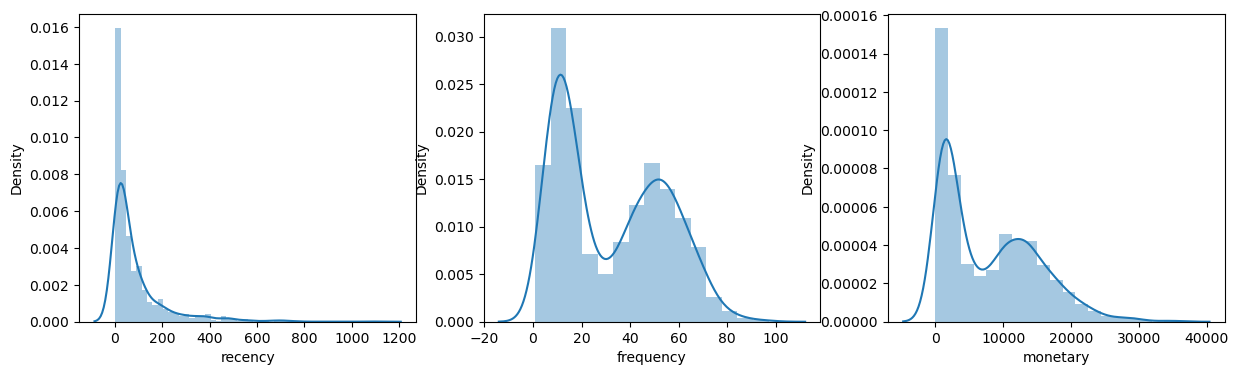

In [87]:
# Use a distplot to visualize the distribution of the data

plt.figure(figsize=(20,4))

# Plot distribution of Recency
plt.subplot(1, 4, 1) 
sns.distplot(datamart["recency"])

# Plot distribution of Frequency
plt.subplot(1, 4, 2) 
sns.distplot(datamart["frequency"])


# Plot distribution of Monetary
plt.subplot(1, 4, 3) 
sns.distplot(datamart["monetary"])

# Show the plot
plt.show()

In [88]:
# Applying log to unskew the data

# Apply log transformation to to RFM

datamart_log = np.log(datamart)

datamart_log.describe().round(2)

,recency,frequency,monetary
count,1590.00,1590.00,1590.00
mean,3.62,3.16,8.39
std,1.45,0.87,1.29
min,0.00,0.00,1.97
25%,2.71,2.48,7.42
50%,3.71,3.33,8.74
75%,4.64,3.95,9.48
max,7.02,4.57,10.48


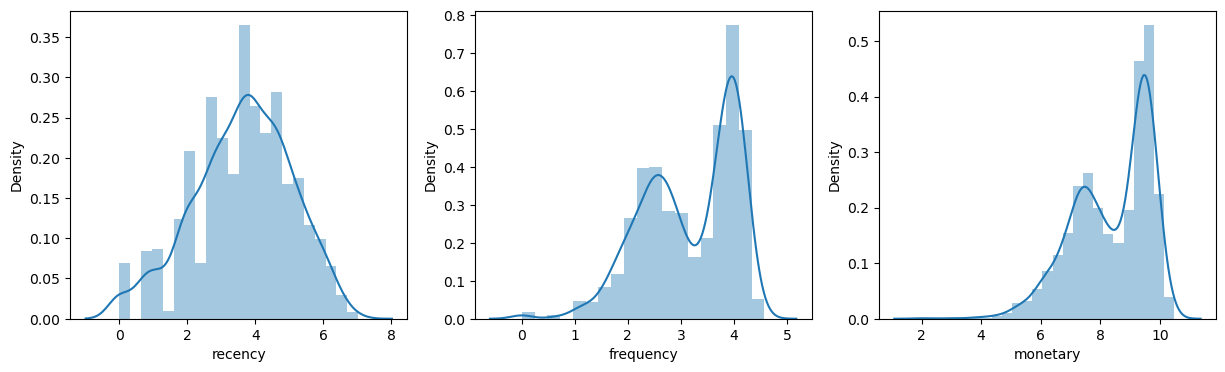

In [89]:
# Use a distplot to visualize the distribution of the data

plt.figure(figsize=(20,4))

# Plot distribution of Recency
plt.subplot(1, 4, 1) 
sns.distplot(datamart_log["recency"])


# Plot distribution of Frequency
plt.subplot(1, 4, 2) 
sns.distplot(datamart_log["frequency"])


# Plot distribution of Monetary
plt.subplot(1, 4, 3) 
sns.distplot(datamart_log["monetary"])


# Show the plot
plt.show()

**Scaling and Centering the data using StandardScaler**


In [90]:
# Normalize the variables

from sklearn.preprocessing import StandardScaler

# Instantiate scaler object
scaler = StandardScaler()
scaler.fit(datamart_log)

# Store for clustering
datamart_normalized = scaler.transform(datamart_log)

print("mean: ", datamart_normalized.mean(axis=0).round(2))
print("std: ", datamart_normalized.std(axis=0).round(2))

mean:  [-0.  0. -0.]
std:  [1. 1. 1.]


In [91]:
# Convert into a dataframe

datamart_normalized = pd.DataFrame(data=datamart_normalized,
                                   index=datamart_log.index, 
                                   columns=datamart_log.columns)

In [92]:
# Explore the summary statistics of datamart

datamart_normalized.describe()

,recency,frequency,monetary
count,1.590000e+03,1.590000e+03,1.590000e+03
mean,-1.564088e-16,2.591917e-16,-6.747922e-16
std,1.000315e+00,1.000315e+00,1.000315e+00
min,-2.500136e+00,-3.615199e+00,-4.971046e+00
25%,-6.277315e-01,-7.727150e-01,-7.461327e-01
50%,6.750812e-02,1.965086e-01,2.739140e-01
75%,7.110965e-01,9.046272e-01,8.494531e-01
max,2.353776e+00,1.617811e+00,1.623541e+00


**Visualize the normalized variables**

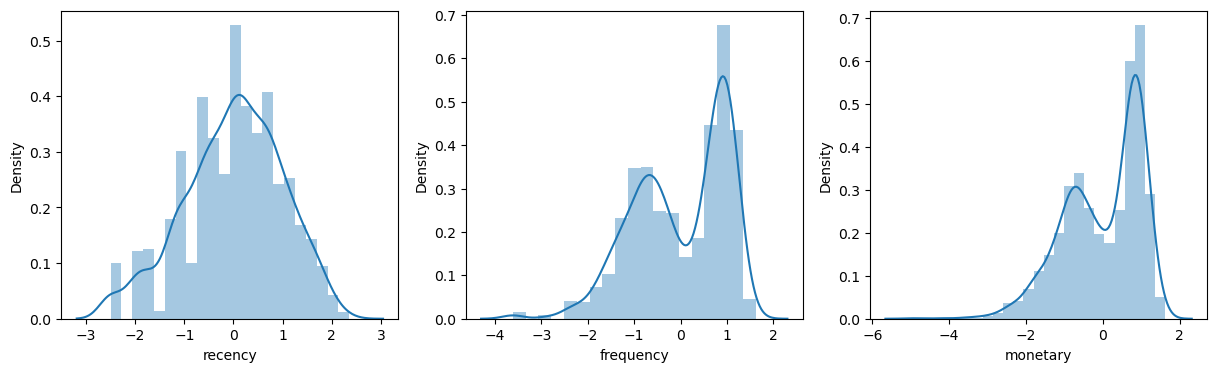

In [93]:
# Use a distplot to visualize the distribution of the data

plt.figure(figsize=(20,4))

# Plot recency distribution
plt.subplot(1, 4, 1)
sns.distplot(datamart_normalized["recency"])

# Plot frequency distribution
plt.subplot(1, 4, 2)
sns.distplot(datamart_normalized["frequency"])

# Plot monetary value distribution
plt.subplot(1, 4, 3)
sns.distplot(datamart_normalized["monetary"])


# Show the plot
plt.show()

### K - Means Model
***Choosing the number of clusters***

In [94]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [95]:
# Fit KMeans and calculate SSE for each k

sse = {}
for k in range(1, 15):
  
    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Fit KMeans on the normalized dataset
    kmeans.fit(datamart_normalized)
    
    # Assign sum of squared distances to k element of dictionary
    # sse is sum of squared distances to closest cluster center
    sse[k] = kmeans.inertia_ 

Creating clusters using KMeans Algorithm
Clusters represent groups with similar behaviours.

A graphical approach ('the elbow method') is employed in selecting the best number of clusters.

The number of clusters at which the sum of square distances reduces insignificantly is chosen as the optimum number of clusters.

At this point, the curve seizes to bend significantly.

It is important to further investigate for clusters in the neighbourhood of the elbow coupled with their corresponding summary RFM values in order to select the approprate cluster number that best explains group behaviour.

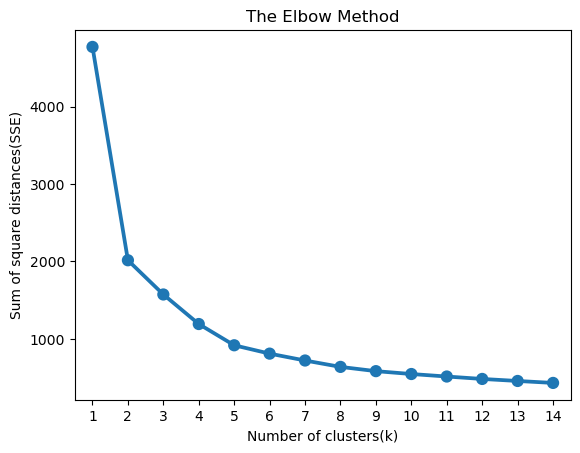

In [96]:
# Add the plot title "The Elbow Method"
plt.title("The Elbow Method")

# Add X-axis label "k"
plt.xlabel("Number of clusters(k)")

# Add Y-axis label "SSE"
plt.ylabel("Sum of square distances(SSE)")

# Plot SSE values for each key in the dictionary
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))

plt.show()

From the elbow diagram, recommended number of cluster is 4. However there is a need to further investigate for clusters of 3,4,5 coupled with their corresponding RFM values in order to choose the approprate cluster number that best explain customer behavior.

### Investigating a Cluster of 3

In [97]:
# Initialize KMeans
kmeans = KMeans(n_clusters=3, random_state=1) 

# Fit k-means clustering on the normalized data set
kmeans.fit(datamart_normalized)

# Extract cluster labels
cluster_labels = kmeans.labels_
# Create a Dataframe by adding a new cluster label column
datamart_rfm_k3 = datamart.assign(Cluster = cluster_labels)

# Gruop the data by cluster
grouped = datamart_rfm_k3.groupby(["Cluster"])

# Calculate average RFM values and segment sizes per cluster value
grouped.agg({
    "recency" : "mean", 
    "frequency": "mean", 
    "monetary":["mean", "count"]
    }).round(1)

recency frequency monetary      
           mean      mean     mean count
Cluster                                 
0          32.5      52.0  13853.4   793
1         239.7       9.2   1304.2   389
2          53.7      15.9   2817.2   408

### Investigating a Cluster of 4

In [98]:
# Initialize KMeans
kmeans = KMeans(n_clusters=4, random_state=1) 

# Fit k-means clustering on the normalized data set
kmeans.fit(datamart_normalized)

# Extract cluster labels
cluster_labels = kmeans.labels_
# Create a Dataframe by adding a new cluster label column
datamart_rfm_k4 = datamart.assign(Cluster = cluster_labels)

# Gruop the data by cluster
grouped = datamart_rfm_k4.groupby(["Cluster"])

# Calculate average RFM values and segment sizes per cluster value
datamart_rfm_k4_grouped=grouped.agg({
    "recency" : "mean", 
    "frequency": "mean", 
    "monetary":["mean", "count"]
    }).round(1)
datamart_rfm_k4_grouped

recency frequency monetary      
           mean      mean     mean count
Cluster                                 
0         261.9       7.9    988.2   296
1           5.5      49.5  13109.3   280
2          78.4      15.0   2637.9   469
3          46.0      51.5  13655.4   545

### Investigating a Cluster of 5

In [99]:
# Initialize KMeans
kmeans = KMeans(n_clusters=5, random_state=1) 

# Fit k-means clustering on the normalized data set
kmeans.fit(datamart_normalized)

# Extract cluster labels
cluster_labels = kmeans.labels_
# Create a Dataframe by adding a new cluster label column
datamart_rfm_k5 = datamart.assign(Cluster = cluster_labels)

# Gruop the data by cluster
grouped = datamart_rfm_k5.groupby(["Cluster"])

# Calculate average RFM values and segment sizes per cluster value
grouped.agg({
    "recency" : "mean", 
    "frequency": "mean", 
    "monetary":["mean", "count"]
    }).round(1)

recency frequency monetary      
           mean      mean     mean count
Cluster                                 
0          17.4      13.8   2155.2   213
1           6.3      53.1  14294.0   278
2         164.1      14.6   2658.9   381
3          46.8      50.9  13433.3   527
4         252.8       6.3    614.4   191

Based on the results above. A cluster of 4 present a more distinct grouping of customers. Hence the chosen Cluster is 4.

Customer Persona

In [100]:
# Rename Clusters to Platinum, Gold, Silver, and Bronze

datamart_rfm_k4["Cluster"] = datamart_rfm_k4[["Cluster"]].replace(
                    {0:"Platinum", 3:"Gold", 2:"Silver", 1: "Bronze"})
datamart_rfm_k4.head()

,recency,frequency,monetary,Cluster
customer_id,,,,
AA-10315,9,42,13747.41300,Bronze
AA-10375,7,42,5884.19500,Bronze
AA-10480,118,38,17695.58978,Gold
AA-10645,27,73,15343.89070,Gold
AA-315,3,8,2243.25600,Silver


In [101]:
# Gruop the data by cluster
grouped = datamart_rfm_k4.groupby(["Cluster"])

# Calculate average RFM values and segment sizes per cluster value
datamart_rfm_k4_grouped=grouped.agg({
    "recency" : "mean", 
    "frequency": "mean", 
    "monetary":["mean", "count"]
    }).round(1)
datamart_rfm_k4_grouped.sort_values(by = ('monetary', 'mean'), ascending = False)

recency frequency monetary      
            mean      mean     mean count
Cluster                                  
Gold        46.0      51.5  13655.4   545
Bronze       5.5      49.5  13109.3   280
Silver      78.4      15.0   2637.9   469
Platinum   261.9       7.9    988.2   296

***Number customers per a cluster***
* Platinum contains 235 customers
* Gold contains 121 customers
* Silver  contains 215 customers
* Bronze contains 122 customers

**Platinum Group**

1. Customers in Platinum are the most frequent buyers and purchase the company's products more than customers in the other groups.
2. On the average, they have 7 transactions with the company within the year 2017.
3. They give the highest monetary value of about 1940 on an average to the company. 4.A larger portion of the company's customers(235) fall within this group.
4. They are the second most recent buyers. On an average, the last time a customer in this group made a transaction with the company is about 2 months away from the snap-shot date.

The company must make a conscious effort to maintain customers in this group.

**Gold Group**

They are the second important customer group to the company.

1. They contributeed an average of 1272 towards revenue.
2. They are great with recency and frequency
3. Within a span of one year, a customer in this group makes 6 transactions on the average.
4. On an average, the last time a customer in this group made a transaction with the company is about 10 days away from the snap-shot date.

**Silver Group**

This is the second largest group with 215 customers.

1. They contributed an average of 537 towards revenue.
2. They are not performing well in terms of frenquency and recency. An avaerage of 3 transactions the whole year and last transaction is 4 months away from the snapshot date.

The company should research more about their preferences and devise more strategies to attract them.

**Bronze Group**

The least active group in terms of all metrics.

1. Within a span of one year, customers in this group made an avarage of a single transaction contributing an average monetary value of 65 to the company.
2. They are the least frequent and recent buyers. On an average, the last time a customer in this group made a transaction with the company is a little over 4 months away from the snap-shot date.

The company should research more about their preferences and devise more strategies to attract them.

### Visualizing clusters with regards to the metrics


**Relative importance of the RFM values within each cluster**

In [102]:
# Calculate average RFM values for each cluster
cluster_avg = datamart_rfm_k4.groupby(["Cluster"]).mean() 

# Calculate average RFM values for the total customer population
population_avg = datamart.mean()

# Calculate relative importance of cluster's attribute value compared to population
relative_imp =  cluster_avg/ population_avg - 1

# Print relative importance scores rounded to 2 decimals
relative_imp.round(2)

,recency,frequency,monetary
Cluster,,,
Bronze,-0.94,0.53,0.65
Gold,-0.48,0.60,0.72
Platinum,1.96,-0.76,-0.88
Silver,-0.11,-0.53,-0.67


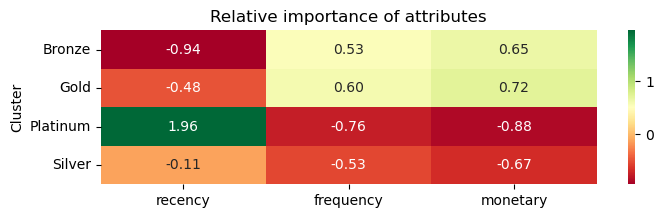

In [103]:
# Initialize a plot with a figure size of 8 by 2 inches 
plt.figure(figsize=(8,2))

# Add the plot title
plt.title("Relative importance of attributes")

# Plot the heatmap
sns.heatmap(data=relative_imp, annot=True, fmt=".2f", cmap="RdYlGn")
plt.show()

The heatmap of the relative importance with regards to the metrics buttresses the findings from the snake plot below.

**Prepare data for the snake plot**

In [104]:
datamart_normalized = pd.DataFrame(datamart_normalized,
                                   index=datamart_rfm_k4.index,
                                   columns=datamart_rfm_k4.columns)
datamart_normalized['Cluster'] = datamart_rfm_k4['Cluster']
datamart_normalized.head()

,recency,frequency,monetary,Cluster
customer_id,,,,
AA-10315,-0.980927,0.660320,0.884872,Bronze
AA-10375,-1.154692,0.660320,0.227418,Bronze
AA-10480,0.798419,0.545835,1.080473,Gold
AA-10645,-0.221323,1.292656,0.969993,Gold
AA-315,-1.740532,-1.236526,-0.519723,Silver


In [105]:
datamart_normalized['Cluster'] = datamart_normalized[
                                    ["Cluster"]].replace(
                                        {0 : "Platinum", 3 : "Gold", 2 : "Silver", 1 : "Bronze"})

In [106]:
# Melt the normalized dataset and reset the index
datamart_melt = pd.melt(datamart_normalized.reset_index(),
                        
                        
# Assign Customer ID and Cluster as ID variables
                    id_vars = ["customer_id", "Cluster"],

# Assign RFM values as value variables
                    value_vars = ["recency", "frequency", "monetary"], 
                        
# Name the variable and value
                    var_name = "Metric", value_name= "Value")

In [107]:
datamart_melt.head()

,customer_id,Cluster,Metric,Value
0,AA-10315,Bronze,recency,-0.980927
1,AA-10375,Bronze,recency,-1.154692
2,AA-10480,Gold,recency,0.798419
3,AA-10645,Gold,recency,-0.221323
4,AA-315,Silver,recency,-1.740532


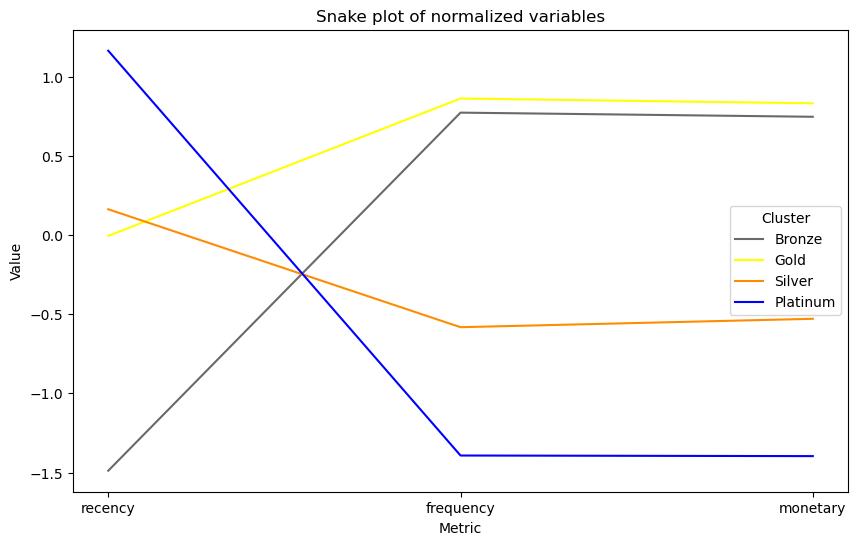

In [108]:
# Plot a Snake plot

plt.figure(figsize = (10,6))

# Add the plot title
plt.title("Snake plot of normalized variables")

# Add the x axis label
plt.xlabel("Metric")

# Add the y axis label
plt.ylabel("Value")

# Plot a line for each value of the cluster variable
sns.lineplot(x ="Metric", y ="Value", hue = "Cluster", data=datamart_melt, 
             palette = ["dimgrey","yellow","darkorange","blue"], ci = None)
plt.show()

**Conclusion and recommendation**

On a general note, the company has a low retention rate. This implies that customers easily churn from the company.

I therefore recommend that research should be conducted to find out why customers easily turn away from the company.

Kmeans clustering was used in grouping customers into four clusters (Groups).

Based on the results, I advise the business to conduct additional study on the Silver and Bronze Groups, which is made up of inactive customers.An in-depth investigation of their preferred products should be conducted.

Also, for the Platinum and Gold customer groups, discount packages, loyalty packages and other customer incencentives should be made available for them to retain them.

In order to improve target marketing, I also advise conducting further research into the products that the various clusters are associated with.

In [ ]:
#new_data.to_csv('superstore.csv', index = False)